In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

In [2]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0


In [3]:
#28X28 is number of pixels in the image stored as a matrix
x_train.shape

(60000, 28, 28)

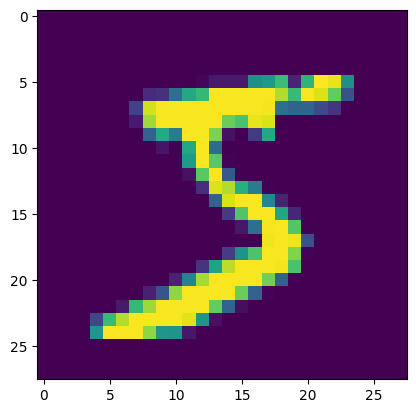

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**SEE ABOVE DIGIT AND FIRST NUMBER IS ARRAY IS SAME IN THE DATASET**

**WE HAVE TO FLATTEN THE 2D ARRAY INTO A 1D ARRAY THAT WILL MAKE IT SEQUENTIAL FROM 28X28 MATRIX WILL BE GO TO  784 DIGITS IN ONE LINE BSICALLLY FLATTEN IT**

In [6]:
model = Sequential([
    Input(shape=(28,28)),          # Explicit input layer
    Flatten(),                      # Flatten the 28x28 → 784
    Dense(128, activation='relu'),  # Hidden layer ReLU(x) = max(0, x) If input is negative → output 0 If input is positive → output same as input
    Dense(32, activation='relu'),   # Hidden layer
    Dense(10, activation='softmax') # Output layer Softmax converts a vector of raw scores (logits) into probabilities that sum to 1. Each output neuron represents probability of a class.
                                    #Most commonly used in multi-class classification.
])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

**Adam = Adaptive Moment Estimation
A type of gradient descent optimizer
Automatically adjusts learning rates for each weight
Why use Adam
Fast convergence
Handles sparse gradients well
Works very well for most ANN/CNN problems**

**loss='sparse_categorical_crossentropy'
What it does
Measures how far the model predictions are from true labels
Since MNIST labels are integers 0–9, we use sparse categorical crossentropy
Crossentropy is standard for multi-class classification**

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
history =model.fit(x_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8489 - loss: 0.5220 - val_accuracy: 0.9541 - val_loss: 0.1531
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9614 - loss: 0.1305 - val_accuracy: 0.9614 - val_loss: 0.1250
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9743 - loss: 0.0869 - val_accuracy: 0.9723 - val_loss: 0.0936
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9809 - loss: 0.0606 - val_accuracy: 0.9739 - val_loss: 0.0863
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9854 - loss: 0.0456 - val_accuracy: 0.9718 - val_loss: 0.1003
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9884 - loss: 0.0359 - val_accuracy: 0.9747 - val_loss: 0.0871
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9898 - loss: 0.0302 - val_accuracy: 0.9730 - val_loss: 0.0959
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9923 - loss: 0.0240 - 

In [10]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=1)
accuracy_score(y_test, y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.9723

**LETS TEST OUT**

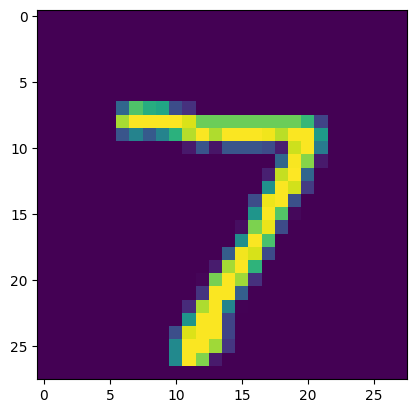

In [11]:
plt.imshow(x_test[0])

In [12]:
model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([7])

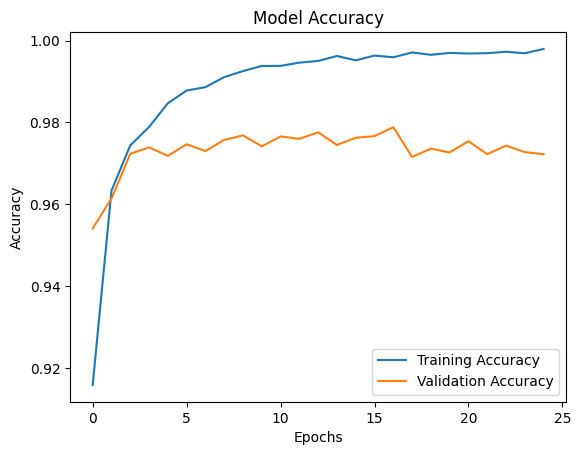

In [13]:
import matplotlib.pyplot as plt
import os

os.makedirs("images", exist_ok=True)

plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.savefig("images/accuracy_plot.png")
plt.show()


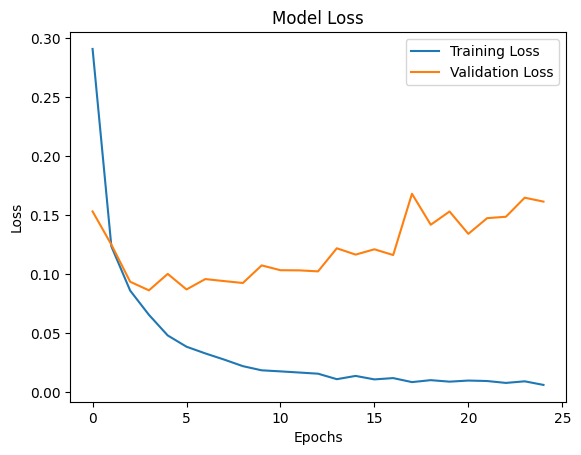

In [14]:
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.savefig("images/loss_plot.png")
plt.show()
